In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [ ]:
df = pd.read_csv('/content/GOOGL.csv')

In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.577003,71.829002,70.974998,71.586502,71.586502,34132000
1,2020-01-28,72.086998,72.739998,71.517998,72.525002,72.525002,29724000
2,2020-01-29,72.922997,73.207001,72.269501,72.834999,72.834999,21566000
3,2020-01-30,71.904999,72.762497,71.750000,72.712502,72.712502,27110000
4,2020-01-31,73.392998,73.483498,71.352997,71.639000,71.639000,43822000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2022-12-09,93.769997,94.260002,92.750000,92.830002,92.830002,28225400
726,2022-12-12,92.709999,93.559998,91.610001,93.309998,93.309998,29420000
727,2022-12-13,97.760002,99.529999,95.029999,95.629997,95.629997,40593700
728,2022-12-14,95.199997,96.870003,93.599998,95.070000,95.070000,28733600
729,2022-12-15,93.129997,93.639999,90.010002,90.860001,90.860001,40107000


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,105.186483,106.421908,103.934501,105.188682,105.188682,3.525172e+07
std,26.494741,26.588691,26.278491,26.421458,26.421458,1.565868e+07
min,52.818501,53.345501,50.443501,52.706501,52.706501,9.312000e+06
25%,79.490752,80.692499,78.776375,79.460625,79.460625,2.507672e+07
50%,105.319751,106.643749,104.294502,105.670002,105.670002,3.145300e+07
75%,128.486751,130.390248,126.583248,127.704999,127.704999,4.041300e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.232000e+08


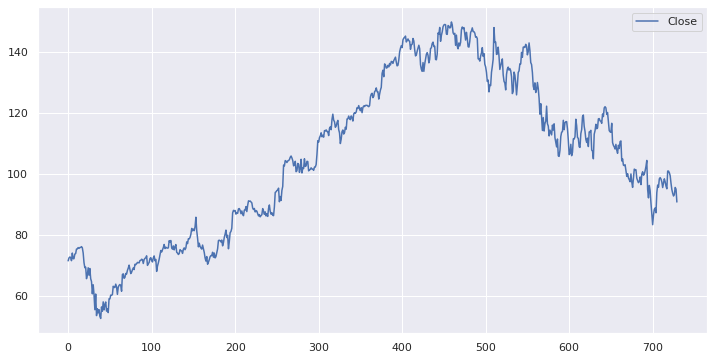

In [ ]:
df[['Close']].plot(figsize=(12,6));


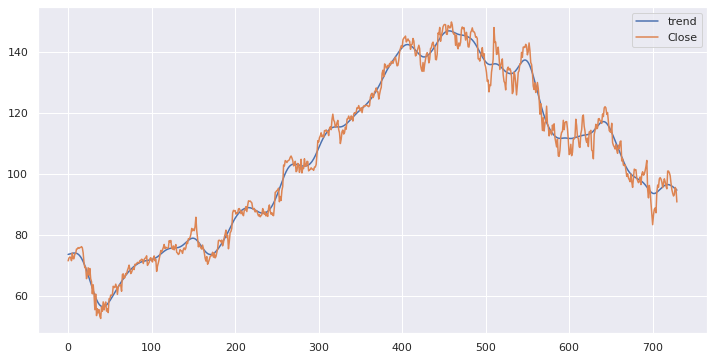

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [ ]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.3316102157982797,
 0.6145894242190959,
 1,
 728,
 {'1%': -3.4393644334758475,
  '5%': -2.8655182850048306,
  '10%': -2.568888486973192},
 3118.2588812140466)

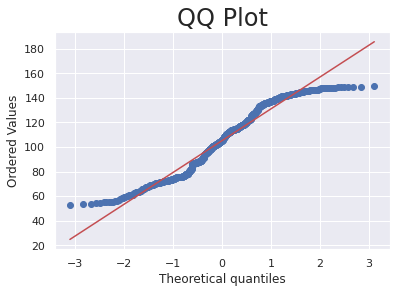

In [ ]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
df['returns'] = df.Close.pct_change(1)*100

In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)


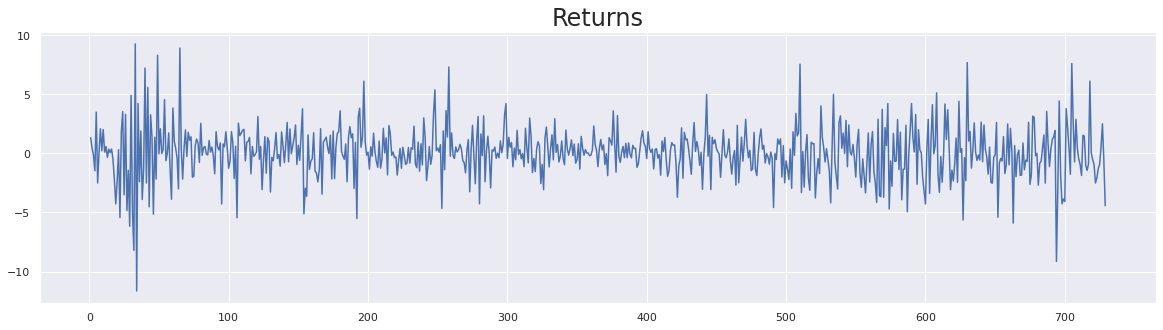

In [ ]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


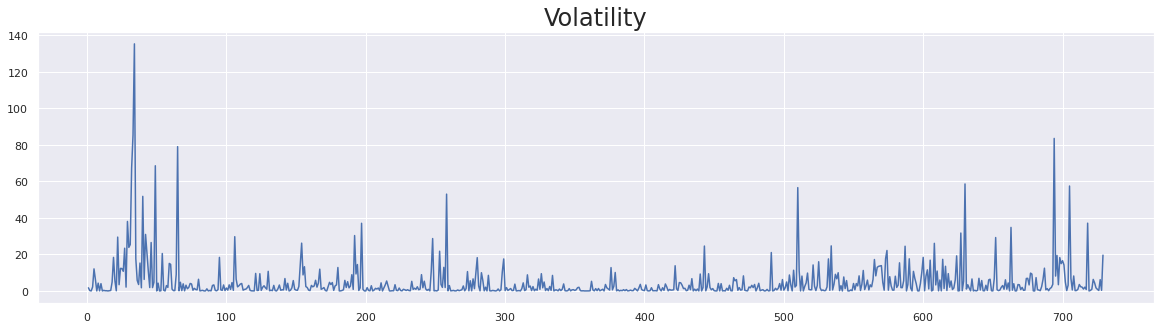

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

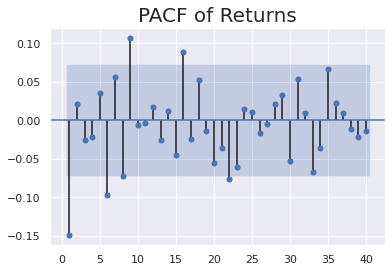

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

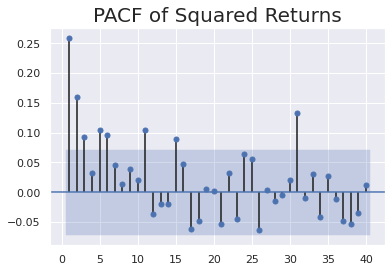

In [ ]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 21.5 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2320.562250936224
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1659.6510379285749
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1608.9588060824867
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1581.5411441086587
Iteration:      5,   Func. Count:     26,   Neg. LLF: 1581.5409641475744
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1581.5409641474648
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1581.5409641475744
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1581.54
Distribution:                  Normal   AIC:                           3169.08
Method:            Maximum Likelihood   BIC:                           3182.86
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:08:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0799  7.715e-02      1.036      0.300 [-7.127e-02,  0.231]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.5042      0.349     10.040  1.015e-23 [  2.820,  4.188]
alpha[1]       0.2911  9.713e-02      2.997  2.722e-03 [  0.101,  0.482]
========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1575.4807950595105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1575.347312846195
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1575.35
Distribution:                  Normal   AIC:                           3158.69
Method:            Maximum Likelihood   BIC:                           3177.06
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:08:19   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0773  7.754e-02      0.997      0.319 [-7.464e-02,  0.229]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.0720      0.373      8.236  1.782e-16   [  2.341,  3.803]
alpha[1]       0.2308      0.115      2.008  4.461e-02 [5.561e-03,  0.456]
alpha[2]       0.1476  7.145e-02      2.065  3.888e-02 [7.534e-03,  0.288]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1570.0821107140246
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1562.1227588623462
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1562.12
Distribution:                  Normal   AIC:                           3134.25
Method:            Maximum Likelihood   BIC:                           3157.20
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:08:34   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0482  7.548e-02      0.639      0.523 [-9.973e-02,  0.196]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.4533      0.344      7.131  9.990e-13    [  1.779,  3.128]
alpha[1]       0.1668      0.116      1.434      0.152 [-6.124e-02,  0.395]
alpha[2]       0.1368  6.501e-02      2.104  3.535e-02  [9.386e-03,  0.264]
alpha[3]       0.2124  7.148e-02      2.971  2.966e-03  [7.229e-02,  0.352]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 63422.90522709703
Iteration:     10,   Func. Count:    173,   Neg. LLF: 1568.4362158216604
Iteration:     15,   Func. Count:    259,   Neg. LLF: 1549.9023891937295
Iteration:     20,   Func. Count:    342,   Neg. LLF: 1538.2114742904228
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1538.2114676282717
            Iterations: 22
            Function evaluations: 373
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1538.21
Distribution:                  Normal   AIC:                           3106.42
Method:            Maximum Likelihood   BIC:                           3175.30
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:08:40   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1248  7.649e-02      1.631      0.103 [-2.514e-02,  0.275]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.5013      0.329      4.565  5.005e-06      [  0.857,  2.146]
alpha[1]       0.0900  8.086e-02      1.113      0.266   [-6.850e-02,  0.248]
alpha[2]       0.0629  4.664e-02      1.348      0.178   [-2.855e-02,  0.154]
alpha[3]       0.1603  6.310e-02      2.541  1.106e-02    [3.665e-02,  0.284]
alpha[4]       0.0000  2.551e-02      0.000      1.000 [-4.999e-02,4.999e-02]
alpha[5]       0.1170  7.124e-02      1.642      0.101   [-2.264e-02,  0.257]
alpha[6]       0.0565  6.779e-02      0.833      0.405   [-7.637e-02,  0.189]
alpha[7]       0.0231  8.120e-02      0.285      0.776      [ -0.136,  0.182]
alpha[8]   1.5098e-13  4.719e-02  3.199e-12      1.000 [-9.250e-02,9.250e-02]
alpha[9]   2.3867e-13  2.118e-02  1.127e-11      1.000 [-4.151e-02,4.151e-02]
alpha[10]      0.0000  3.694e-02      0.000      1.000 [-7.241e-02,7.241e-02]
alpha[11]      0.1177  5.308e-02      2.217  2.660e-02    [1.366e-02,  0.222]
alpha[12]      0.0000  1.536e-02      0.000      1.000 [-3.011e-02,3.011e-02]
alpha[13]      0.0607  5.724e-02      1.061      0.289   [-5.148e-02,  0.173]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1552.968950970789
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1549.3598315392212
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1549.36
Distribution:                  Normal   AIC:                           3106.72
Method:            Maximum Likelihood   BIC:                           3125.09
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:08:51   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0794  7.060e-02      1.125      0.261 [-5.896e-02,  0.218]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1404      0.118      1.194      0.233 [-9.012e-02,  0.371]
alpha[1]       0.0953  3.813e-02      2.498  1.249e-02  [2.051e-02,  0.170]
beta[1]        0.8774  5.738e-02     15.292  8.678e-53    [  0.765,  0.990]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1545.8601485145127
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1545.4936371786766
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1545.4929204220814
            Iterations: 14
            Function evaluations: 99
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1545.49
Distribution:                  Normal   AIC:                           3100.99
Method:            Maximum Likelihood   BIC:                           3123.94
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:08:56   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0691  6.821e-02      1.013      0.311 [-6.459e-02,  0.203]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2539      0.141      1.802  7.148e-02 [-2.219e-02,  0.530]
alpha[1]       0.1612  4.714e-02      3.420  6.269e-04  [6.881e-02,  0.254]
beta[1]    7.6965e-03  5.576e-02      0.138      0.890    [ -0.102,  0.117]
beta[2]        0.7824  7.578e-02     10.325  5.447e-25    [  0.634,  0.931]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1548.504165603798
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1593.5656397882585
Iteration:     15,   Func. Count:    118,   Neg. LLF: 1545.49292103625
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1545.4929203916
            Iterations: 16
            Function evaluations: 125
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1545.49
Distribution:                  Normal   AIC:                           3102.99
Method:            Maximum Likelihood   BIC:                           3130.54
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:09:02   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0691  6.818e-02      1.014      0.311 [-6.453e-02,  0.203]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2539      0.157      1.619      0.105 [-5.348e-02,  0.561]
alpha[1]       0.1612  4.828e-02      3.339  8.414e-04  [6.657e-02,  0.256]
beta[1]    7.6934e-03      0.134  5.728e-02      0.954    [ -0.256,  0.271]
beta[2]        0.7824  7.518e-02     10.407  2.301e-25    [  0.635,  0.930]
beta[3]        0.0000      0.152      0.000      1.000    [ -0.298,  0.298]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1549.436334435164
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1549.3598315399595
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1549.359831539768
            Iterations: 10
            Function evaluations: 73
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1549.36
Distribution:                  Normal   AIC:                           3108.72
Method:            Maximum Likelihood   BIC:                           3131.68
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:09:07   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0794  7.217e-02      1.100      0.271 [-6.204e-02,  0.221]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1404      0.132      1.064      0.287    [ -0.118,  0.399]
alpha[1]       0.0953  7.634e-02      1.248      0.212 [-5.437e-02,  0.245]
alpha[2]       0.0000  9.467e-02      0.000      1.000    [ -0.186,  0.186]
beta[1]        0.8774  6.958e-02     12.611  1.840e-36    [  0.741,  1.014]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1550.6760083001009
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1549.3355957777599
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1549.3355803568152
            Iterations: 12
            Function evaluations: 98
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1549.34
Distribution:                  Normal   AIC:                           3110.67
Method:            Maximum Likelihood   BIC:                           3138.22
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:09:13   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0795  7.212e-02      1.102      0.271 [-6.189e-02,  0.221]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1531      0.207      0.738      0.461    [ -0.254,  0.560]
alpha[1]       0.0896  7.369e-02      1.216      0.224 [-5.482e-02,  0.234]
alpha[2]       0.0000      0.102      0.000      1.000    [ -0.199,  0.199]
alpha[3]       0.0120      0.116      0.103      0.918    [ -0.216,  0.240]
beta[1]        0.8687      0.121      7.172  7.379e-13    [  0.631,  1.106]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 4457.416130085938
Iteration:     10,   Func. Count:     83,   Neg. LLF: 4701.387848002276
Iteration:     15,   Func. Count:    120,   Neg. LLF: 1526596806435.3018
Iteration:     20,   Func. Count:    162,   Neg. LLF: 5397.895242163726
Iteration:     25,   Func. Count:    202,   Neg. LLF: 2368.4027042011276
Iteration:     30,   Func. Count:    240,   Neg. LLF: 6047.671415493003
Iteration:     35,   Func. Count:    280,   Neg. LLF: 1524.66704900624
Iteration:     40,   Func. Count:    336,   Neg. LLF: 22245949479.409485
Iteration:     45,   Func. Count:    416,   Neg. LLF: 4914.977936101408
Iteration:     50,   Func. Count:    496,   Neg. LLF: 4155.538029472989
Iteration:     55,   Func. Count:    576,   Neg. LLF: 3523.8122711626943
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1521.7854187572336
            Iterations: 58
            Function evaluations: 634
            Gradient evaluation

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1521.79
Distribution:                  Normal   AIC:                           3053.57
Method:            Maximum Likelihood   BIC:                           3076.53
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:09:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0710  2.449e-04    289.920      0.000 [7.051e-02,7.147e-02]
                               Volatility Model                               
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
omega          0.0112  3.495e-12  3.202e+09      0.000   [1.119e-02,1.119e-02]
alpha[1]      -0.0556  4.846e-05  -1147.745      0.000 [-5.571e-02,-5.552e-02]
gamma[1]      -0.0980  2.331e-04   -420.250      0.000 [-9.841e-02,-9.750e-02]
beta[1]        0.9904  1.301e-09  7.612e+08      0.000       [  0.990,  0.990]
==============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1539.13
Distribution:                  Normal   AIC:                           3088.26
Method:            Maximum Likelihood   BIC:                           3111.22
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:09:34   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0425  8.688e-02      0.489      0.625 [ -0.128,  0.213]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1045      0.284      0.368      0.713   [ -0.453,  0.662]
alpha[1]   4.1269e-12      0.286  1.445e-11      1.000   [ -0.560,  0.560]
gamma[1]       0.1221  4.603e-02      2.653  7.982e-03 [3.189e-02,  0.212]
beta[1]        0.9170      0.309      2.969  2.987e-03   [  0.312,  1.522]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1538.487285085559
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1535.3254935567284
Iteration:     15,   Func. Count:    107,   Neg. LLF: 1534.9454909170054
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1534.9454219045151
            Iterations: 17
            Function evaluations: 119
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1534.95
Distribution:                  Normal   AIC:                           3079.89
Method:            Maximum Likelihood   BIC:                           3102.85
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:09:44   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         8.4490e-03  8.596e-02  9.829e-02      0.922 [ -0.160,  0.177]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0553  9.755e-02      0.567      0.571    [ -0.136,  0.247]
alpha[1]       0.0000      0.216      0.000      1.000    [ -0.424,  0.424]
gamma[1]       0.1150  7.441e-02      1.546      0.122 [-3.083e-02,  0.261]
beta[1]        0.9319      0.182      5.119  3.074e-07    [  0.575,  1.289]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import FIGARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1549.7173321307118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1549.1868527887577
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1549.19
Distribution:                  Normal   AIC:                           3108.37
Method:            Maximum Likelihood   BIC:                           3131.33
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:09:59   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0847  7.114e-02      1.191      0.234 [-5.473e-02,  0.224]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1662      0.136      1.224      0.221   [ -0.100,  0.433]
phi            0.1199      0.170      0.707      0.480   [ -0.213,  0.453]
d              0.4757      0.163      2.914  3.566e-03   [  0.156,  0.796]
beta           0.5187      0.225      2.309  2.094e-02 [7.843e-02,  0.959]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import HARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1627.6841587626795
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1581.5491019454048
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1581.5409640628984
            Iterations: 14
            Function evaluations: 72
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1581.54
Distribution:                  Normal   AIC:                           3169.08
Method:            Maximum Likelihood   BIC:                           3182.86
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:10:11   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0799  7.715e-02      1.036      0.300 [-7.127e-02,  0.231]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.5042      0.349     10.040  1.018e-23 [  2.820,  4.188]
alpha[1]       0.2912  9.714e-02      2.997  2.723e-03 [  0.101,  0.482]
========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import APARCH


In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 5861.706171451429
Iteration:     10,   Func. Count:     86,   Neg. LLF: 1780.8301500573955
Iteration:     15,   Func. Count:    126,   Neg. LLF: 1536.0131967387629
Iteration:     20,   Func. Count:    165,   Neg. LLF: 1535.5579811094472
Iteration:     25,   Func. Count:    199,   Neg. LLF: 1535.5537940114107
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1535.5537940113581
            Iterations: 25
            Function evaluations: 199
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1535.55
Distribution:                  Normal   AIC:                           3083.11
Method:            Maximum Likelihood   BIC:                           3110.66
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        00:10:27   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0182  7.074e-02      0.257      0.797 [ -0.120,  0.157]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0497  4.647e-02      1.070      0.284  [-4.134e-02,  0.141]
alpha[1]       0.0527  1.853e-02      2.842  4.483e-03 [1.634e-02,8.896e-02]
gamma[1]       0.9997  5.132e-02     19.481  1.577e-84     [  0.899,  1.100]
beta[1]        0.9371  3.859e-02     24.284 2.904e-130     [  0.861,  1.013]
delta          1.0270      0.402      2.558  1.053e-02     [  0.240,  1.814]
============================================================================

Covariance estimator: robust
"""

In [ ]:
from scipy import stats


In [ ]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=42.523911875372846, pvalue=5.835121275055144e-10)

In [ ]:
jarque_bera_test.statistic

42.523911875372846

In [ ]:
jarque_bera_test.pvalue

5.835121275055144e-10

jarquer-bera para los retornos

In [ ]:
returns = df.returns[1:]
returns

1      1.311001
2      0.427435
3     -0.168184
4     -1.476365
5      3.477152
         ...   
725   -0.939064
726    0.517070
727    2.486335
728   -0.585587
729   -4.428315
Name: returns, Length: 729, dtype: float64

In [ ]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=266.93265614087017, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

266.93265614087017

In [ ]:
jarque_bera_test.pvalue

0.0

curtosis

In [ ]:
returns.kurt()

2.9919671843510964

coef. asimetria

In [ ]:
returns.skew()

-0.04179627650527745

In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.256
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -3.943
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.687
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.387
P-value                         0.078
Lags                                7
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Open        730 non-null    float64
 2   High        730 non-null    float64
 3   Low         730 non-null    float64
 4   Close       730 non-null    float64
 5   Adj Close   730 non-null    float64
 6   Volume      730 non-null    int64  
 7   trend       730 non-null    float64
 8   returns     729 non-null    float64
 9   sq_returns  729 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 57.2+ KB


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [ ]:
data = pd.read_csv("/content/GOOGL.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.577003,71.829002,70.974998,71.586502,71.586502,34132000
1,2020-01-28,72.086998,72.739998,71.517998,72.525002,72.525002,29724000
2,2020-01-29,72.922997,73.207001,72.269501,72.834999,72.834999,21566000
3,2020-01-30,71.904999,72.762497,71.750000,72.712502,72.712502,27110000
4,2020-01-31,73.392998,73.483498,71.352997,71.639000,71.639000,43822000
...,...,...,...,...,...,...,...
725,2022-12-09,93.769997,94.260002,92.750000,92.830002,92.830002,28225400
726,2022-12-12,92.709999,93.559998,91.610001,93.309998,93.309998,29420000
727,2022-12-13,97.760002,99.529999,95.029999,95.629997,95.629997,40593700
728,2022-12-14,95.199997,96.870003,93.599998,95.070000,95.070000,28733600


In [ ]:
data = data[["Date","Close","Volume"]]


In [ ]:
data

,Date,Close,Volume
0,2020-01-27,71.586502,34132000
1,2020-01-28,72.525002,29724000
2,2020-01-29,72.834999,21566000
3,2020-01-30,72.712502,27110000
4,2020-01-31,71.639000,43822000
...,...,...,...
725,2022-12-09,92.830002,28225400
726,2022-12-12,93.309998,29420000
727,2022-12-13,95.629997,40593700
728,2022-12-14,95.070000,28733600


In [ ]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,71.586502,34132000,72.525002
1,2020-01-28,72.525002,29724000,72.834999
2,2020-01-29,72.834999,21566000,72.712502
3,2020-01-30,72.712502,27110000,71.639000
4,2020-01-31,71.639000,43822000,74.129997
...,...,...,...,...
725,2022-12-09,92.830002,28225400,93.309998
726,2022-12-12,93.309998,29420000,95.629997
727,2022-12-13,95.629997,40593700,95.070000
728,2022-12-14,95.070000,28733600,90.860001


In [ ]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,71.586502,34132000,72.525002
1,2020-01-28,72.525002,29724000,72.834999
2,2020-01-29,72.834999,21566000,72.712502
3,2020-01-30,72.712502,27110000,71.639000
4,2020-01-31,71.639000,43822000,74.129997
...,...,...,...,...
724,2022-12-08,93.709999,32213300,92.830002
725,2022-12-09,92.830002,28225400,93.309998
726,2022-12-12,93.309998,29420000,95.629997
727,2022-12-13,95.629997,40593700,95.070000


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [ ]:
price_volume_target_scaled_df

array([[0.19437468, 0.21793341, 0.20403678],
       [0.20403678, 0.17922872, 0.20722829],
       [0.20722829, 0.10759694, 0.20596715],
       ...,
       [0.4180239 , 0.17655943, 0.44190891],
       [0.44190891, 0.27467073, 0.43614359],
       [0.43614359, 0.17053245, 0.39280052]])

In [ ]:
price_volume_target_scaled_df.shape

(729, 3)

In [ ]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [ ]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [ ]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

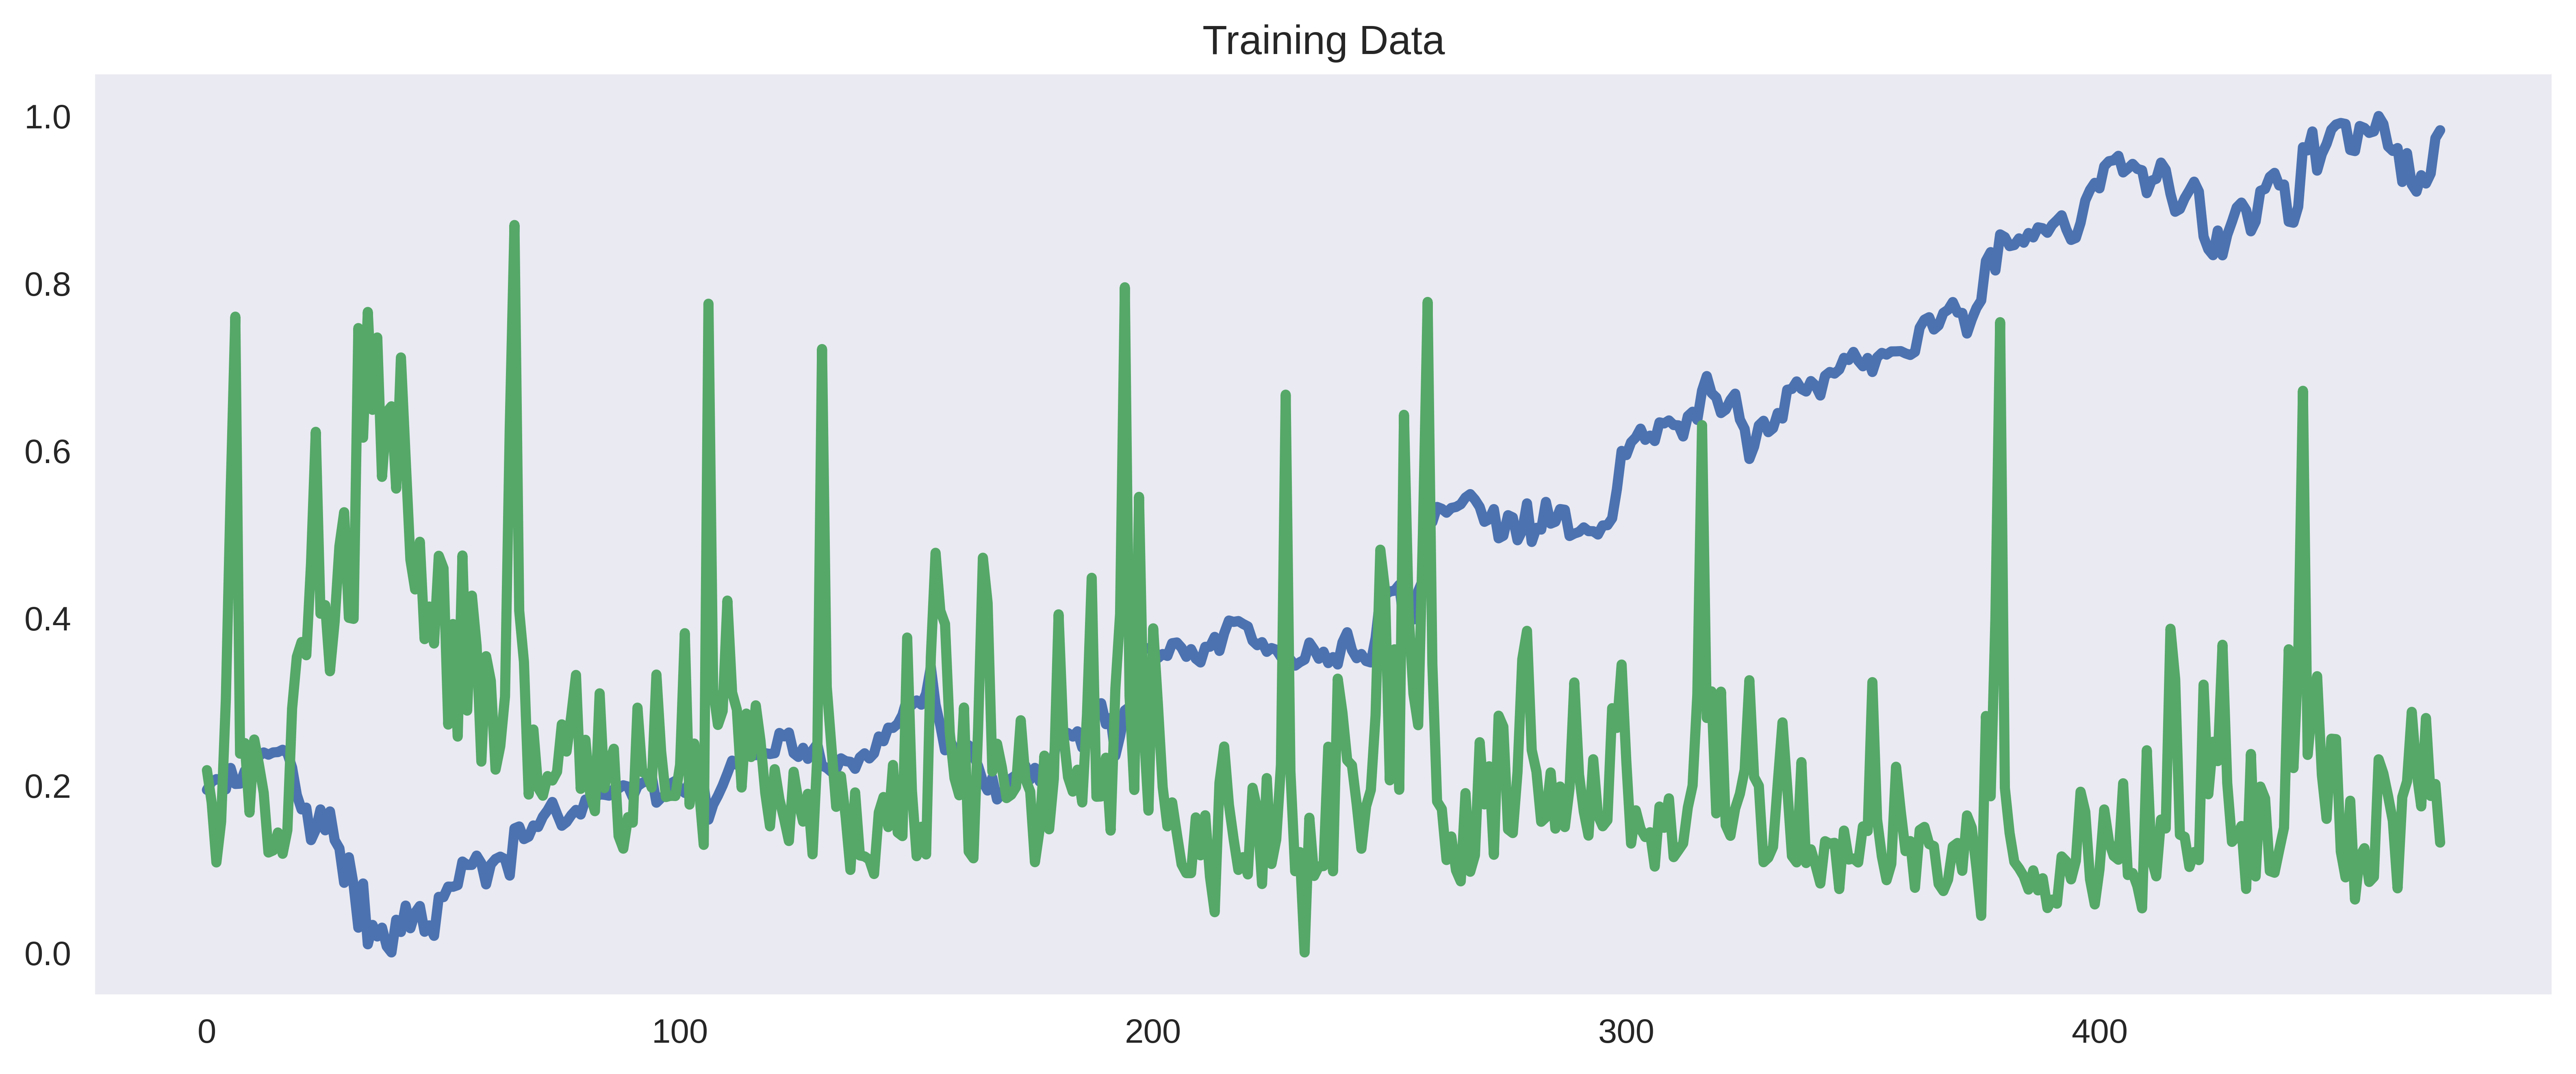

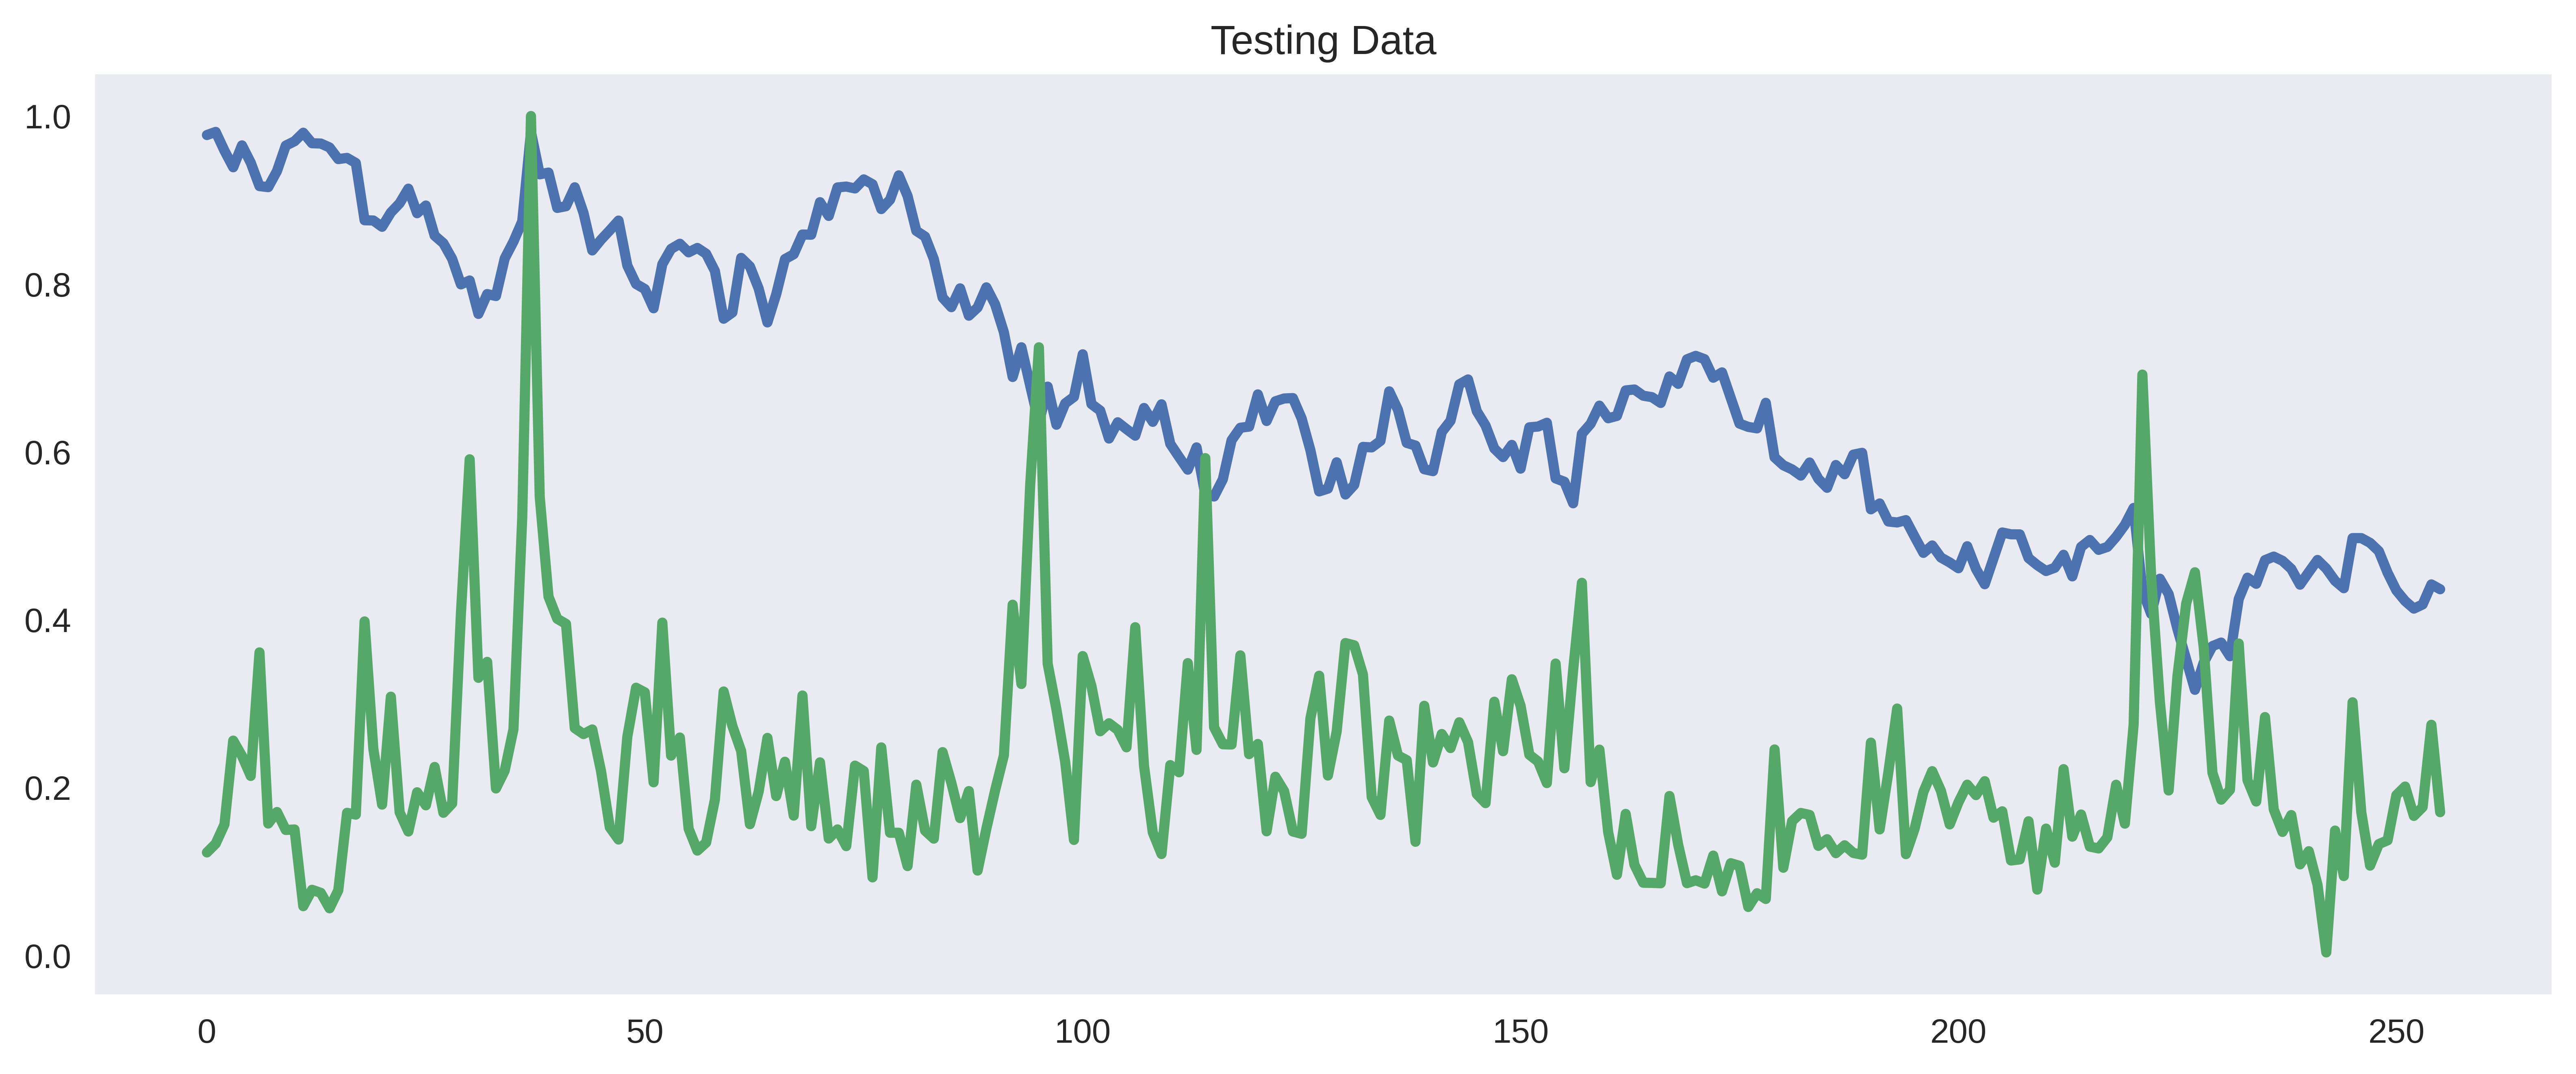

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9721293250541126


In [ ]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.20344419],
       [0.21327149],
       [0.21715581],
       [0.21539992],
       [0.20304762],
       [0.22536847],
       [0.20442007],
       [0.21040762],
       [0.22526579],
       [0.22774064],
       [0.24160426],
       [0.24263448],
       [0.24729265],
       [0.24544042],
       [0.24808976],
       [0.24821285],
       [0.25121016],
       [0.24695447],
       [0.22857233],
       [0.19602564],
       [0.17902312],
       [0.18127486],
       [0.14223256],
       [0.15270629],
       [0.17865647],
       [0.15418659],
       [0.17703668],
       [0.14289065],
       [0.13238079],
       [0.09187071],
       [0.12300133],
       [0.09080261],
       [0.03723783],
       [0.09014245],
       [0.01770771],
       [0.04156079],
       [0.02715554],
       [0.03922762],
       [0.01660613],
       [0.00947364],
       [0.04857159],
       [0.03264207],
       [0.06467616],
       [0.03959421],
       [0.05804887],
       [0.06526938],
       [0.03653524],
       [0.043

In [ ]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

729

In [ ]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
724,2022-12-08
725,2022-12-09
726,2022-12-12
727,2022-12-13


In [ ]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.194375
1,2020-01-28,0.204037
2,2020-01-29,0.207228
3,2020-01-30,0.205967
4,2020-01-31,0.194915
...,...,...
724,2022-12-08,0.422142
725,2022-12-09,0.413082
726,2022-12-12,0.418024
727,2022-12-13,0.441909


In [ ]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.194375,0.203444
1,2020-01-28,0.204037,0.213271
2,2020-01-29,0.207228,0.217156
3,2020-01-30,0.205967,0.215400
4,2020-01-31,0.194915,0.203048
...,...,...,...
724,2022-12-08,0.422142,0.425392
725,2022-12-09,0.413082,0.416951
726,2022-12-12,0.418024,0.421649
727,2022-12-13,0.441909,0.443840


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
data

,Date,Close,Volume,Target
0,2020-01-27,71.586502,34132000,72.525002
1,2020-01-28,72.525002,29724000,72.834999
2,2020-01-29,72.834999,21566000,72.712502
3,2020-01-30,72.712502,27110000,71.639000
4,2020-01-31,71.639000,43822000,74.129997
...,...,...,...,...
725,2022-12-09,92.830002,28225400,93.309998
726,2022-12-12,93.309998,29420000,95.629997
727,2022-12-13,95.629997,40593700,95.070000
728,2022-12-14,95.070000,28733600,90.860001


In [ ]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,71.586502,34132000,72.525002
1,2020-01-28,72.525002,29724000,72.834999
2,2020-01-29,72.834999,21566000,72.712502
3,2020-01-30,72.712502,27110000,71.639000
4,2020-01-31,71.639000,43822000,74.129997
...,...,...,...,...
725,2022-12-09,92.830002,28225400,93.309998
726,2022-12-12,93.309998,29420000,95.629997
727,2022-12-13,95.629997,40593700,95.070000
728,2022-12-14,95.070000,28733600,90.860001


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[7.1586502e+01, 3.4132000e+07],
       [7.2525002e+01, 2.9724000e+07],
       [7.2834999e+01, 2.1566000e+07],
       ...,
       [9.5629997e+01, 4.0593700e+07],
       [9.5070000e+01, 2.8733600e+07],
       [9.0860001e+01, 4.0107000e+07]])

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.19437468]),
 array([0.20403678]),
 array([0.20722829]),
 array([0.20596715]),
 array([0.19491516]),
 array([0.22056064]),
 array([0.20141662]),
 array([0.20174605]),
 array([0.21714779]),
 array([0.21876413]),
 array([0.23397539]),
 array([0.23469605]),
 array([0.23910763]),
 array([0.23641026]),
 array([0.23915908]),
 array([0.23952455]),
 array([0.24231972]),
 array([0.23826341]),
 array([0.22100334]),
 array([0.18826437]),
 array([0.17099927]),
 array([0.17313551]),
 array([0.13426056]),
 array([0.14676936]),
 array([0.17099927]),
 array([0.14598177]),
 array([0.16856959]),
 array([0.13416277]),
 array([0.12437201]),
 array([0.08321665]),
 array([0.11378328]),
 array([0.08069943]),
 array([0.02955769]),
 array([0.08243421]),
 array([0.0097136]),
 array([0.03290881]),
 array([0.01907714]),
 array([0.02961948]),
 array([0.00724786]),
 array([0.]),
 array([0.03906024]),
 array([0.02444611]),
 array([0.0560011]),
 array([0.02889366]),
 array([0.04745086]),
 array([0.05550178])

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 9s 163ms/step - loss: 0.1815 - val_loss: 0.5686
Epoch 2/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0673 - val_loss: 0.0449
Epoch 3/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0342 - val_loss: 0.1067
Epoch 4/20
13/13 [==============================] - 0s 20ms/step - loss: 0.0227 - val_loss: 0.0429
Epoch 5/20
13/13 [==============================] - 0s 17ms/step - loss: 0.0124 - val_loss: 0.0119
Epoch 6/20
13/13 [==============================] - 0s 20ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 7/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 8/20
13/13 [==============================] - 0s 25ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 9/20
13/13 [==============================] - 0s 26ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 10/20
13/13 [==============================] - 0s 29ms/step - loss: 0.0017 - val_loss: 9.9897e-04
Epoc

In [ ]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 4s 8ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.1986642,
 0.20750429,
 0.21043022,
 0.20927367,
 0.199158,
 0.2226849,
 0.20510437,
 0.205406,
 0.21954302,
 0.22103064,
 0.23506707,
 0.2357337,
 0.23981792,
 0.23732005,
 0.2398656,
 0.24020419,
 0.24279515,
 0.23903589,
 0.2230927,
 0.19308771,
 0.17738965,
 0.17932728,
 0.1442752,
 0.15550561,
 0.17738965,
 0.15479718,
 0.17518744,
 0.1441876,
 0.1354298,
 0.09892583,
 0.12599,
 0.09670935,
 0.05208631,
 0.098236665,
 0.034981817,
 0.05498641,
 0.043037985,
 0.05213975,
 0.03286473,
 0.02665224,
 0.06031865,
 0.04766915,
 0.07506189,
 0.051512048,
 0.06761012,
 0.074626125,
 0.047882482,
 0.05452735,
 0.043707892,
 0.08418514,
 0.08390106,
 0.094943,
 0.09474832,
 0.09648739,
 0.12144032,
 0.11781619,
 0.11787551,
 0.12774515,
 0.11957505,
 0.09728032,
 0.11832318,
 0.12415821,
 0.1266452,
 0.1240163,
 0.10655486,
 0.15686281,
 0.15895784,
 0.14536849,
 0.14794427,
 0.16003376,
 0.15836905,
 0.16944745,
 0.17646565,
 0.18546183,
 0.1721949,
 0.15971372,
 0.16367285,
 0.17120737,

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
725,2022-12-09
726,2022-12-12
727,2022-12-13
728,2022-12-14


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2020-01-28,0.198664
2,2020-01-29,0.207504
3,2020-01-30,0.210430
4,2020-01-31,0.209274
5,2020-02-03,0.199158
...,...,...
725,2022-12-09,0.414099
726,2022-12-12,0.405255
727,2022-12-13,0.410076
728,2022-12-14,0.433471


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.198664,0.204037
2,2020-01-29,0.207504,0.207228
3,2020-01-30,0.210430,0.205967
4,2020-01-31,0.209274,0.194915
5,2020-02-03,0.199158,0.220561
...,...,...,...
725,2022-12-09,0.414099,0.413082
726,2022-12-12,0.405255,0.418024
727,2022-12-13,0.410076,0.441909
728,2022-12-14,0.433471,0.436144


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")